# Praktische Übung 1
## Aufgabe 1: Minimales XOR-Netzwerk
In dieser Aufgabe entwickeln Sie das erste neuronale Netzwerk in PyTorch, das das XOR Problem löst. Die Definition des XOR Problems ist in der Tabelle auf dem Übungsblatt gegeben. Dort sehen sie auch die Architektur des zu entwickelnden Netzwerks.

Das Netzwerk soll zwei fully-connected Layer haben und 4 versteckte Neuronen. Die Eingaben sind x_1 und x_2 und die Ausgabe y=\[y_1, y_2\], wobei y_1 der Wahrscheinlichkeit, dass XOR(x_1, x_2) = 0 und y_2 der Wahrscheinlichkeit, dass XOR(x_1, x_2) = 1 entspricht. Nach dem ersten fully-connected Layer soll eine ReLU Aktivierung stattfinden. Es soll eine Cross Entropy Funktion als Loss benutzt werden, diese sollen Sie in der Main-Methode hinzufügen. Vor der Lossfunktion soll eine SoftMax-Aktivierung benutzt werden. Außerdem müssen Sie sich für einen Optimizer entscheiden (nn.optim), Sie können ein paar unterschiedliche
ausprobieren. Ein weiterer zu wählender Parameter ist eine sinnvolle Anzahl von Trainingsepochen. Die Dokumentation von PyTorch https://pytorch.org/docs/stable ist sehr hilfreich für diese Aufgabe.

Als Bonusaufgabe können Sie das Netzwerk auf der GPU benutzen, indem Sie das Netz, die benötigten Tensoren und Funktionen mit .cuda() auf die GPU verlagern. Wie wirkt sich das aus auf die Zeit pro Epoche? Wie erklären Sie sich das?

In [2]:
# Import der benoetigten Pakete
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import time
import numpy as np

# Prüfe GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## To Do 1
Ergaenzen Sie die Klasse ``XORNet``.

In [3]:
class XORNet(nn.Module):
    def __init__(self):
        super(XORNet, self).__init__()
        self.linear1 = nn.Linear(2, 4)
        self.linear2 = nn.Linear(4, 2)

    def forward(self, x):
        x = F.relu(self.linear1(x))
        x = F.softmax(self.linear2(x), dim=1)
        return x


## To Do 2
Initialisieren Sie die Loss-Funktion, waehlen Sie einen Optimierer und die Anzahl an Epochen.

In [4]:
if __name__=="__main__":

    net = XORNet().to(device)
    cross_entropy = nn.BCELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=0.01)
    epochs = 2000

    # Trainingsdaten
    x = torch.Tensor([[0, 0],[0, 1], [1, 0], [1, 1]]).to(device)
    y = torch.Tensor([[1, 0], [0, 1], [0, 1], [1, 0]]).to(device)
    X = x.repeat(8, 1) # 32 training data, 2 channels
    Y = y.repeat(8, 1)

    steps = 8
    run_loss = np.zeros(epochs)

# To Do 3
Ergaenzen Sie die Trainingsschleife. Setzen Sie dazu die Gradienten des Optimierers auf Null. Berechnen Sie anschließend die Loss-Funktion und führen Sie die Backpropagation durch.

In [5]:
prob_1_true = []
prob_1_false = []
prob_2_true = []
prob_2_false = []
prob_3_true = []
prob_3_false = []
prob_4_true = []
prob_4_false = []

for epoch in range(epochs):
    start = time.time()
    idx_epoch = torch.randperm(32).view(4, 8) # mini-batches
    run_loss[epoch] = 0

    for step in range(steps):
        idx_iter = idx_epoch[:, step]
        x_curr = X[idx_iter, ...]
        y_curr = Y[idx_iter, ...]

        # most important part of training!
        optimizer.zero_grad()
        y_pred = net(x_curr)
        loss = cross_entropy(y_pred, y_curr)
        loss.backward()
        optimizer.step()

        run_loss[epoch] += loss.item() # next step!

        end = time.time()

    with torch.no_grad():
        classifications = net(x)
        prob_1_true.append(classifications[0][0].item())
        prob_1_false.append(classifications[0][1].item())
        prob_2_true.append(classifications[1][0].item())
        prob_2_false.append(classifications[1][1].item())
        prob_3_true.append(classifications[2][0].item())
        prob_3_false.append(classifications[2][1].item())
        prob_4_true.append(classifications[3][0].item())
        prob_4_false.append(classifications[3][1].item())

    print("Epoch {}; Epoch Time {}; Loss: {}".format(epoch, end-start, loss))

Epoch 0; Epoch Time 0.09956955909729004; Loss: 0.6696276068687439
Epoch 1; Epoch Time 0.007899999618530273; Loss: 0.6579443216323853
Epoch 2; Epoch Time 0.007259368896484375; Loss: 0.6883166432380676
Epoch 3; Epoch Time 0.007203578948974609; Loss: 0.6221085786819458
Epoch 4; Epoch Time 0.007053375244140625; Loss: 0.6313919425010681
Epoch 5; Epoch Time 0.007012367248535156; Loss: 0.5191176533699036
Epoch 6; Epoch Time 0.007099151611328125; Loss: 0.4914868474006653
Epoch 7; Epoch Time 0.007105112075805664; Loss: 0.4408166706562042
Epoch 8; Epoch Time 0.006963968276977539; Loss: 0.680022656917572
Epoch 9; Epoch Time 0.007163286209106445; Loss: 0.49255093932151794
Epoch 10; Epoch Time 0.007081270217895508; Loss: 0.4842049777507782
Epoch 11; Epoch Time 0.007057905197143555; Loss: 0.3585478961467743
Epoch 12; Epoch Time 0.0070858001708984375; Loss: 0.5131335854530334
Epoch 13; Epoch Time 0.006997585296630859; Loss: 0.3004765212535858
Epoch 14; Epoch Time 0.007397890090942383; Loss: 0.2840384

# Plots
Für einen Eindruck des Trainingsverlaufs wird im Folgenden der Loss über alle Epochen geplottet. Außerdem werden die prädizierten Werte y_1 und y_2 für die Eingaben \[0, 0\], \[1, 0\], \[0, 1\] und \[1, 1\] Verlauf des Trainings dargestellt.

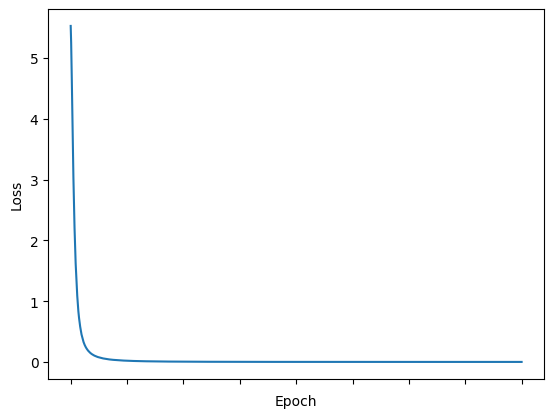

In [6]:
fig, ax = plt.subplots(1, 1)
ax.plot(run_loss)
ax.set_xticklabels([])
plt.xlabel('Epoch')
plt.ylabel('Loss');

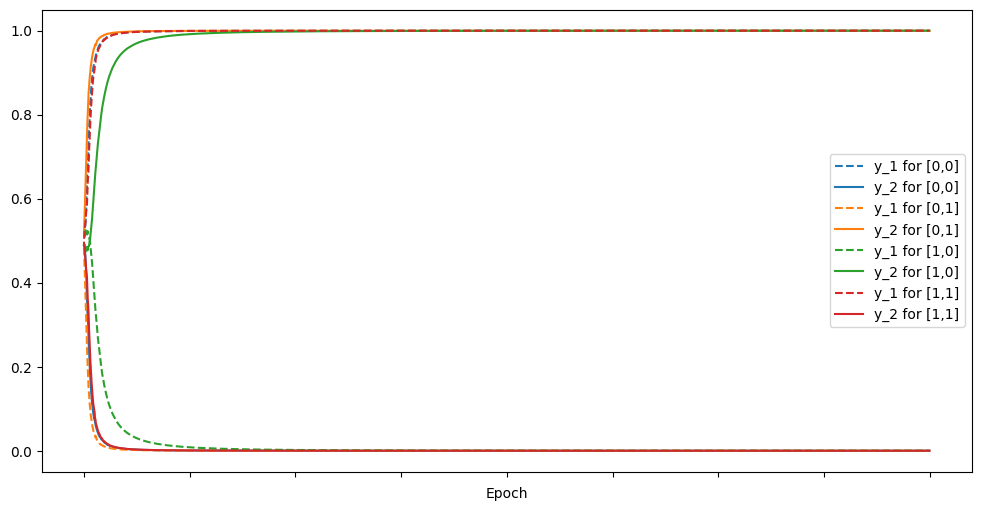

In [7]:
tmp = np.arange(0, epochs)
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
plt.plot(tmp, prob_1_true, '--', tmp, prob_1_false, 'C0')
plt.plot(tmp, prob_2_true, '--', tmp, prob_2_false, 'C1')
plt.plot(tmp, prob_3_true, '--', tmp, prob_3_false, 'C2')
plt.plot(tmp, prob_4_true, '--', tmp, prob_4_false, 'C3')
ax.set_xticklabels([])
plt.xlabel('Epoch')
plt.legend(('y_1 for [0,0]', 'y_2 for [0,0]', 'y_1 for [0,1]', 'y_2 for [0,1]',
            'y_1 for [1,0]', 'y_2 for [1,0]', 'y_1 for [1,1]', 'y_2 for [1,1]'));